# Gradient Descent - Evolution of the Cost Function

**Installations**

In [ ]:
pip install numpy
pip install matplotlib

**Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *

First we define a function :

In [12]:
def function(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

**A little maths now**

We then manually compute the gradient of our function :

f(x1, x2) = 0.5*x1² + (5/2)*x2² - x1*x2 - 2*(x1 + x2)

The partial derivative of f with respect to x1 is :

df(x1, x2)/dx1  = -2 + x1 - x2

The partial derivative of f with respect to x2 is :

df(x1, x2)/dx2  = -2 - x1 + 5*x2

In [11]:
from IPython.display import Image

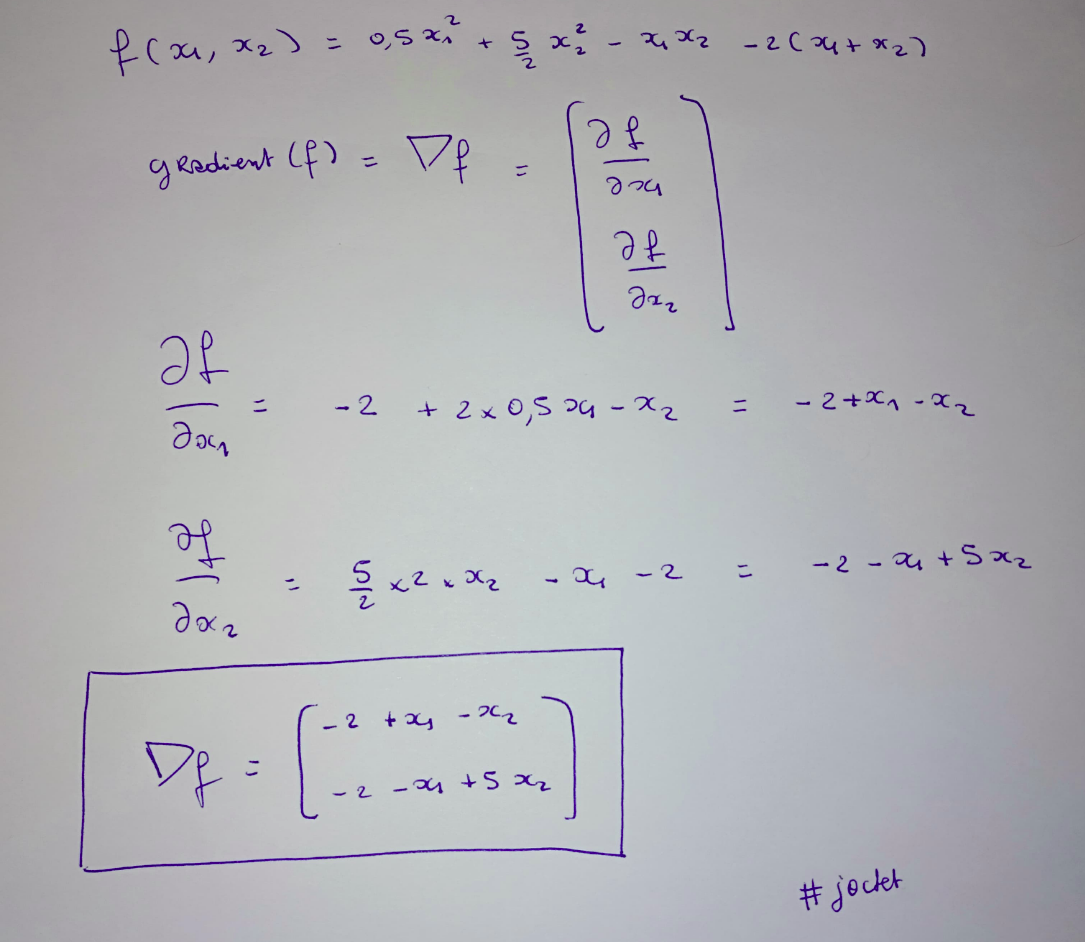

In [13]:
Image(filename='gradient_computation.png')

* We define the Gradient function that returns the result we calculated above, and the Norm function. 
* The Norm function will be useful to see how far we have traveled in each iteration of our gradient descent.

In [25]:
def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

In [39]:
# We initialize our variables x1 and x2 with arbitrary values :
x1, x2 = 2, 1

# We initialize our gradient value as well :
grad_f = gradient(x1, x2)

# We set a value for our step t (the bigger t is, the faster our algorithm converges - 
# but if t is too big, our algorithm may diverge, so be careful and test several values for the step).
t = 0.1

# We also set a value for the "epsilon" threshold: 
# we will stop the iteration as soon as the distance traveled during the gradient descent is less than the set threshold.
epsilon = pow(10,-6)

n_grad = norm(grad_f)
i = 1
f_value = function(x1, x2)
diff_f = 0
L_diff = []
evolution_X1_X2 = [[x1, x2]]

# Gradient descent :

while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    diff_f = function(x1, x2) - f_value
    L_diff.append(diff_f)
    f_value = function(x1, x2)
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1    
    
    
# We retrieve the evolution of our two variables X1 and X2 in the evolution_X1_X2 array :
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

**Visualization**

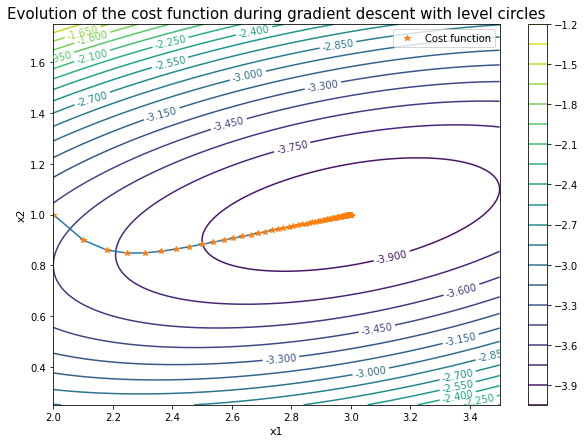

In [40]:
x1 = np.linspace(2, 3.5, 150)
x2 = np.linspace(0.25, 1.75, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = function(X1, X2)


fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)

plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

## Another version more colorful - lets be crazy

In [41]:
def function(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

def gradient(x1, x2):
    return np.array([-2 + x1 - x2, -2 - x1 + 5*x2])

def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

x1, x2 = -25, -35
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
t = 0.1
epsilon = pow(10,-6)
n_grad = norm(grad_f)
i = 1
f_value = function(x1, x2)
diff_f = 0
L_diff = []
evolution_X1_X2 = [[x1, x2]]

while n_grad > epsilon:
    
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    diff_f = function(x1, x2) - f_value
    L_diff.append(diff_f)
    f_value = function(x1, x2)
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1  

evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

**Visualization**

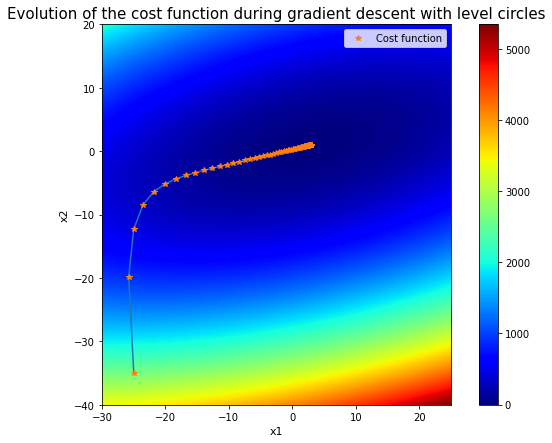

In [43]:
x1 = np.linspace(-30, 25, 150)
x2 = np.linspace(-40, 20, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = function(X1, X2)

fig = plt.figure(figsize = (10,7))

plt.imshow(Z, extent = [-30,25,-40,20], origin = 'lower', cmap = 'jet', alpha = 1)

plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)

plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")

plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

# I hope you found this interesting!